Commands to access kaggle

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


Downloading the dataset from kaggle

In [ ]:
#importing dataset from kaggle
! kaggle datasets download alessiocorrado99/animals10
#unzipping images


animals10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip animals10.zip

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os #allows file pathing
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sklearn
import cv2 #image processing
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

In [2]:
translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", 
             "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", 
             "mucca": "cow", "pecora": "sheep","ragno":"spider", "scoiattolo": "squirrel", 
             "dog": "cane", "cavallo": "horse", "elephant" : "elefante", 
             "butterfly": "farfalla", "chicken": "gallina", "cat": "gatto", 
             "cow": "mucca", "spider": "ragno", "squirrel": "scoiattolo"}
X = [] #data
y = [] #labels
z = []#actual labels
i = 0
#iterate through rawimg folder
for foldername in os.listdir("raw-img"):
  print(foldername)

  specific_animal_folder = os.path.join('raw-img',foldername)
  #raw-img/cane
  #rawimg/dog

  # #for each image in an animal folder
  for image in os.listdir(specific_animal_folder):
    #print(image) #filenames
    #need to put each image into a created dataset
    picpath = os.path.join(specific_animal_folder,image)
    #print(pic) #image path
    #read in image from path
    
    img = mpimg.imread(picpath)
    #print(img)
    resized_img = cv2.resize(img, (128, 128), interpolation=cv2.INTER_LINEAR)
    #resized_img = cv2.resize(img, (128, 128))
    #data.append([resized_img,translate[foldername]])
    if resized_img.shape ==(128,128,3):
        X.append(resized_img) #matrix of image
        y.append(i) #appending numbers for categories instead of names
        #need this for one hot
        #z.append(translate[foldername])
    
  i = i + 1
      
    




mucca
ragno
cavallo
gallina
elefante
scoiattolo
cane
farfalla
pecora
gatto


3


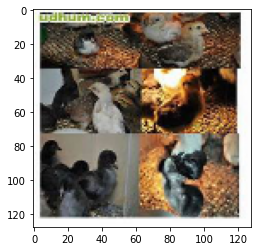

In [ ]:
#output testing
#print(X[9345])
print(y[9345]) #label
#print(z[9345])
plt.imshow(X[9345])
plt.show()
#random.shuffle(data)
#print(y[4])
#print(z[4])
#print(data[0])
# for i in range (len(y)):
#   print(y[i])

In [3]:
#need to change lists into numpy arrays for processing
X = np.array(X)
y = np.array(y)

In [4]:
#one hot encoding for categories
import sklearn.preprocessing
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(y)+1))
y = label_binarizer.transform(y)
print(y)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [5]:
from sklearn.model_selection import train_test_split
#splitting off testing and validation
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
    test_size=0.20, random_state= 42)

In [ ]:
print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", x_test.shape)

print("y_test: ", y_test.shape)
print("x_val: ", x_val.shape)
print("y_val: ", y_val.shape)

X_train:  (16721, 128, 128, 3)
y_train:  (16721, 10)
X_test:  (5226, 128, 128, 3)
y_test:  (5226, 10)
x_val:  (4181, 128, 128, 3)
y_val:  (4181, 10)


In [13]:
cnn = tf.keras.models.Sequential() #initializing the CNN
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding = "same", input_shape=[128, 128, 3])) #Convolution 1
cnn.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", padding = "same"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 1

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding = "same"))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding = "same"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 2

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")) #Convolution 4
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding = "same")) #Convolution 5
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same"))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding = "same")) 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2)) #Pooling 3

cnn.add(tf.keras.layers.Flatten()) #Flatenning
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))#Full Connection1
cnn.add(tf.keras.layers.Dense(units=64, activation="relu"))#Full Connection2
cnn.add(tf.keras.layers.Dense(units=32, activation="relu"))#Full Connection3
cnn.add(tf.keras.layers.Dense(units= 10, activation= "softmax"))#Output layer

cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 128, 128, 16)      448       
                                                                 
 conv2d_17 (Conv2D)          (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 conv2d_19 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

In [14]:
cnn.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [15]:
history = cnn.fit(x_train,y_train, batch_size = 200, epochs=10, validation_data=(x_val,y_val))

Epoch 1/10
84/84 [==============================] - 9s 102ms/step - loss: 2.2487 - accuracy: 0.2200 - val_loss: 1.9873 - val_accuracy: 0.3435
Epoch 2/10
84/84 [==============================] - 7s 88ms/step - loss: 1.8074 - accuracy: 0.3872 - val_loss: 1.6525 - val_accuracy: 0.4363
Epoch 3/10
84/84 [==============================] - 7s 88ms/step - loss: 1.4918 - accuracy: 0.4911 - val_loss: 1.4768 - val_accuracy: 0.4956
Epoch 4/10
84/84 [==============================] - 7s 89ms/step - loss: 1.3178 - accuracy: 0.5452 - val_loss: 1.3313 - val_accuracy: 0.5520
Epoch 5/10
84/84 [==============================] - 7s 88ms/step - loss: 1.1573 - accuracy: 0.6023 - val_loss: 1.1898 - val_accuracy: 0.5999
Epoch 6/10
84/84 [==============================] - 7s 88ms/step - loss: 1.0157 - accuracy: 0.6558 - val_loss: 1.2301 - val_accuracy: 0.5752
Epoch 7/10
84/84 [==============================] - 7s 89ms/step - loss: 0.9153 - accuracy: 0.6903 - val_loss: 1.0807 - val_accuracy: 0.6417
Epoch 8/10
8

In [16]:
score = cnn.evaluate(x_test, y_test)
print('Total loss on Testing Set:', score[0])
print('Accuracy of Testing Set:', score[1])

164/164 [==============================] - 1s 8ms/step - loss: 1.1186 - accuracy: 0.6596
Total loss on Testing Set: 1.118599534034729
Accuracy of Testing Set: 0.6595866680145264


In [ ]:
X_new = x_test[990:1000]
y_proba = cnn.predict(X_new)
y_proba.round(2)

array([[0.05, 0.  , 0.76, 0.06, 0.1 , 0.  , 0.  , 0.  , 0.  , 0.02],
       [0.15, 0.03, 0.02, 0.01, 0.02, 0.13, 0.02, 0.1 , 0.1 , 0.42],
       [0.11, 0.02, 0.  , 0.  , 0.  , 0.02, 0.  , 0.04, 0.33, 0.47],
       [0.16, 0.02, 0.02, 0.03, 0.02, 0.09, 0.12, 0.01, 0.05, 0.48],
       [0.2 , 0.04, 0.03, 0.08, 0.03, 0.19, 0.03, 0.02, 0.01, 0.37],
       [0.13, 0.04, 0.02, 0.02, 0.02, 0.05, 0.03, 0.1 , 0.21, 0.39],
       [0.03, 0.03, 0.04, 0.04, 0.07, 0.1 , 0.06, 0.17, 0.02, 0.44],
       [0.33, 0.08, 0.07, 0.13, 0.06, 0.02, 0.03, 0.1 , 0.1 , 0.08],
       [0.17, 0.03, 0.01, 0.01, 0.01, 0.1 , 0.01, 0.01, 0.16, 0.49],
       [0.28, 0.03, 0.04, 0.  , 0.09, 0.17, 0.05, 0.06, 0.08, 0.18]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(cnn.predict(X_new), axis=-1)
y_pred

array([2, 9, 9, 9, 9, 9, 9, 0, 9, 0])

In [ ]:
names = ["dog",
"cat",
"cow",
"elephant",
"horse",
"chicken",
"sheep",
"butterfly",
"squirrel",
"spider"]

In [ ]:
np.array(names)[y_pred]

array(['cow', 'spider', 'spider', 'spider', 'spider', 'spider', 'spider',
       'dog', 'spider', 'dog'], dtype='<U9')

In [ ]:
y_new = y_test[990:1000]
y_new

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

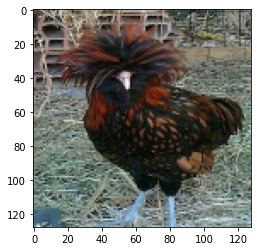

In [ ]:
plt.imshow(X_new[2]/255.)


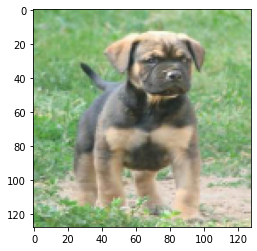

In [ ]:
plt.imshow(X_new[1]/255.)

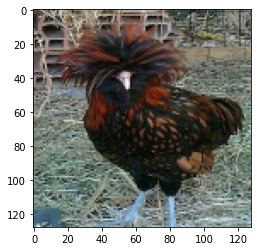

In [ ]:
plt.imshow(X_new[2]/255.)

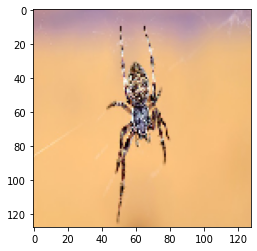

In [ ]:
plt.imshow(X_new[3]/255.)